In [22]:
!pip install opencv-python

In [23]:
!pip install tensorflow


In [24]:
!pip install tensorflow opencv-python matplotlib

In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
from glob import glob
from PIL import Image
from numpy import asarray

In [ ]:
import os
dirct = r"C:"  # Eğitim veri klasörün
path = os.listdir(dirct)  # Klasördeki dosya ve klasörleri listele
classes = {'notumor': 0, 'tumor': 1}  # Yeni sınıflar


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle

# **📌 Klasör yolunu tanımla**
dirct = r""

# **📌 Sınıfları otomatik olarak algıla**
classes = {cls_name: idx for idx, cls_name in enumerate(os.listdir(dirct)) if os.path.isdir(os.path.join(dirct, cls_name))}
print("Tanımlanan sınıflar:", classes)  # {'notumor': 0, 'tumor': 1} şeklinde olmalı

# **📌 Görüntü ve etiket listeleri**
X = []
Y = []

# **📌 Klasörleri ve dosyaları oku**
for cls in classes:
    pth = os.path.join(dirct, cls)
    file_list = os.listdir(pth)
    
    print(f"'{cls}' sınıfında {len(file_list)} adet dosya bulundu.")  # Veri setini kontrol et
    
    for j in file_list:
        img_path = os.path.join(pth, j)  # Tam dosya yolunu oluştur
        img = cv2.imread(img_path)  # Görüntüyü oku
        
        if img is not None:  # Yükleme hatası var mı kontrol et
            img = cv2.resize(img, (224, 224))  # Görüntüyü yeniden boyutlandır
            X.append(img)  # Görüntüyü X'e ekle
            Y.append(classes[cls])  # Etiketi Y'ye ekle
        else:
            print(f"Hata: {img_path} yüklenemedi!")

# **📌 X ve Y listelerini numpy array'lerine çevir**
X = np.array(X, dtype=np.float32) / 255.0  # Normalizasyon (0-1 arası)
Y = np.array(Y)

# **📌 Y'yi one-hot encoding ile kategorik hale getir**
Y = to_categorical(Y, num_classes=len(classes))

# **📌 Veriyi karıştır**
X, Y = shuffle(X, Y, random_state=42)

# **📌 Çıktıları kontrol et**
print("X shape:", X.shape)  # (sample_size, 224, 224, 3) olmalı
print("Y shape:", Y.shape)  # (sample_size, num_classes) olmalı

# **📌 İlk 5 etiketi ve görüntüyü kontrol et**
for i in range(5):
    print(f"Etiket: {Y[i]} -> Sınıf: {'notumor' if Y[i][0] == 1 else 'tumor'}")


Tanımlanan sınıflar: {'notumor': 0, 'tumor': 1}
'notumor' sınıfında 1595 adet dosya bulundu.
'tumor' sınıfında 1457 adet dosya bulundu.
X shape: (3052, 224, 224, 3)
Y shape: (3052, 2)
Etiket: [1. 0.] -> Sınıf: notumor
Etiket: [1. 0.] -> Sınıf: notumor
Etiket: [1. 0.] -> Sınıf: notumor
Etiket: [1. 0.] -> Sınıf: notumor
Etiket: [0. 1.] -> Sınıf: tumor


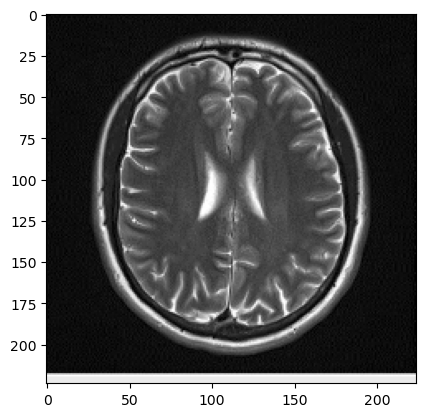

In [29]:
import matplotlib.pyplot as plt
import cv2

# RGB -> Grayscale dönüştürme
gray_image = cv2.cvtColor(X[0], cv2.COLOR_BGR2GRAY)

# Görüntüyü gri tonlama ile gösterme
plt.imshow(gray_image, cmap='gray')
plt.show()


In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=10,test_size=0.20)
print ("Shape of an image in x_train: ", x_train[0].shape)
print ("Shape of an image in x_test: ", x_test[0].shape)

Shape of an image in x_train:  (224, 224, 3)
Shape of an image in x_test:  (224, 224, 3)


In [31]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import numpy as np

# **1️⃣ Eğer y_train zaten 2D ise (wrong format), bunu 1D'ye çeviriyoruz**
if len(y_train.shape) > 1:
    y_train = np.argmax(y_train, axis=1)  # One-hot encoding varsa geri çevir
    y_test = np.argmax(y_test, axis=1)

# **2️⃣ Label Encoding işlemi (sınıfları sayısal değerlere çevir)**
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

num_classes = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# **4️⃣ NumPy Array dönüşümü**
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# **5️⃣ Veri boyutlarını kontrol edelim**
print("x_train Shape:", x_train.shape)
print("x_test Shape:", x_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)


x_train Shape: (2441, 224, 224, 3)
x_test Shape: (611, 224, 224, 3)
y_train Shape: (2441, 2)
y_test Shape: (611, 2)


In [ ]:

import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, callbacks
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# **📌 Veri Setini Yükleme**
dirct = r""
classes = {cls_name: idx for idx, cls_name in enumerate(os.listdir(dirct)) if os.path.isdir(os.path.join(dirct, cls_name))}
print("Tanımlanan sınıflar:", classes)

X, Y = [], []
for cls in classes:
    pth = os.path.join(dirct, cls)
    for j in os.listdir(pth):
        img_path = os.path.join(pth, j)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (224, 224))
            X.append(img)
            Y.append(classes[cls])

X = np.array(X, dtype=np.float32) / 255.0  # Normalizasyon
Y = np.array(Y)
Y = to_categorical(Y, num_classes=len(classes))

# **📌 Veriyi Karıştır ve Train-Test Ayır**
X, Y = shuffle(X, Y, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])

model = tf.keras.models.Sequential([
    data_augmentation,  
    layers.Flatten(input_shape=(224, 224, 3)),  

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(2, activation='softmax')  # 2 sınıf için softmax
])

# **📌 Modeli Derleme**
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# **📌 Callbacks**
checkpoint = callbacks.ModelCheckpoint(
    "model.h5", monitor="val_loss", save_best_only=True, mode="auto", verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5, verbose=1
)

# **📌 Modeli Eğitme**
history = model.fit(
    x_train, y_train,
    epochs=30,
    validation_data=(x_test, y_test),
    batch_size=32,
    verbose=1,
    callbacks=[checkpoint, reduce_lr]
)

# **📌 Modeli Kaydetme**
model.save("final_model.h5")


Tanımlanan sınıflar: {'notumor': 0, 'tumor': 1}


C:\Users\mert\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.7445 - loss: 0.6411
Epoch 1: val_loss improved from inf to 2.57074, saving model to model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 43s 450ms/step - accuracy: 0.7450 - loss: 0.6398 - val_accuracy: 0.5450 - val_loss: 2.5707 - learning_rate: 0.0010
Epoch 2/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.8310 - loss: 0.4284
Epoch 2: val_loss improved from 2.57074 to 0.66419, saving model to model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 33s 433ms/step - accuracy: 0.8309 - loss: 0.4284 - val_accuracy: 0.6776 - val_loss: 0.6642 - learning_rate: 0.0010
Epoch 3/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.8416 - loss: 0.3789
Epoch 3: val_loss improved from 0.66419 to 0.28684, saving model to model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 34s 439ms/step - accuracy: 0.8417 - loss: 0.3788 - val_accuracy: 0.8560 - val_loss: 0.2868 - learning_rate: 0.0010
Epoch 4/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.8464 - loss: 0.3536
Epoch 4: val_loss improved from 0.28684 to 0.23904, saving model to model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 31s 402ms/step - accuracy: 0.8465 - loss: 0.3536 - val_accuracy: 0.9133 - val_loss: 0.2390 - learning_rate: 0.0010
Epoch 5/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.8553 - loss: 0.3524
Epoch 5: val_loss did not improve from 0.23904
77/77 ━━━━━━━━━━━━━━━━━━━━ 31s 397ms/step - accuracy: 0.8554 - loss: 0.3522 - val_accuracy: 0.8805 - val_loss: 0.2535 - learning_rate: 0.0010
Epoch 6/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.8647 - loss: 0.3181
Epoch 6: val_loss did not improve from 0.23904
77/77 ━━━━━━━━━━━━━━━━━━━━ 31s 396ms/step - accuracy: 0.8646 - loss: 0.3184 - val_accuracy: 0.8642 - val_loss: 0.2825 - learning_rate: 0.0010
Epoch 7/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.8703 - loss: 0.3261
Epoch 7: val_loss did not improve from 0.23904

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
77/77 ━━━━━━━━━━━━━━━━━━━━ 29s 381ms/step - accuracy: 0.8702 - loss: 0.3263 - val_accuracy: 0.8445

77/77 ━━━━━━━━━━━━━━━━━━━━ 35s 451ms/step - accuracy: 0.8666 - loss: 0.3098 - val_accuracy: 0.9116 - val_loss: 0.2384 - learning_rate: 5.0000e-04
Epoch 11/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.8952 - loss: 0.2701
Epoch 11: val_loss did not improve from 0.23837
77/77 ━━━━━━━━━━━━━━━━━━━━ 30s 385ms/step - accuracy: 0.8950 - loss: 0.2704 - val_accuracy: 0.9067 - val_loss: 0.2509 - learning_rate: 5.0000e-04
Epoch 12/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.8788 - loss: 0.3078
Epoch 12: val_loss improved from 0.23837 to 0.23568, saving model to model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 33s 431ms/step - accuracy: 0.8788 - loss: 0.3077 - val_accuracy: 0.9018 - val_loss: 0.2357 - learning_rate: 5.0000e-04
Epoch 13/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.8962 - loss: 0.2743
Epoch 13: val_loss did not improve from 0.23568
77/77 ━━━━━━━━━━━━━━━━━━━━ 32s 413ms/step - accuracy: 0.8960 - loss: 0.2746 - val_accuracy: 0.9083 - val_loss: 0.2578 - learning_rate: 5.0000e-04
Epoch 14/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.8932 - loss: 0.2707
Epoch 14: val_loss improved from 0.23568 to 0.21765, saving model to model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 37s 476ms/step - accuracy: 0.8931 - loss: 0.2708 - val_accuracy: 0.9149 - val_loss: 0.2176 - learning_rate: 5.0000e-04
Epoch 15/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.8863 - loss: 0.3001
Epoch 15: val_loss did not improve from 0.21765
77/77 ━━━━━━━━━━━━━━━━━━━━ 32s 409ms/step - accuracy: 0.8863 - loss: 0.3001 - val_accuracy: 0.9182 - val_loss: 0.2323 - learning_rate: 5.0000e-04
Epoch 16/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.8837 - loss: 0.2881
Epoch 16: val_loss improved from 0.21765 to 0.21707, saving model to model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 35s 456ms/step - accuracy: 0.8838 - loss: 0.2879 - val_accuracy: 0.9264 - val_loss: 0.2171 - learning_rate: 5.0000e-04
Epoch 17/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 0.8992 - loss: 0.2679
Epoch 17: val_loss did not improve from 0.21707
77/77 ━━━━━━━━━━━━━━━━━━━━ 32s 413ms/step - accuracy: 0.8991 - loss: 0.2681 - val_accuracy: 0.8953 - val_loss: 0.2497 - learning_rate: 5.0000e-04
Epoch 18/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.8877 - loss: 0.2827
Epoch 18: val_loss did not improve from 0.21707
77/77 ━━━━━━━━━━━━━━━━━━━━ 32s 414ms/step - accuracy: 0.8877 - loss: 0.2827 - val_accuracy: 0.9051 - val_loss: 0.2506 - learning_rate: 5.0000e-04
Epoch 19/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.8896 - loss: 0.2857
Epoch 19: val_loss did not improve from 0.21707

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
77/77 ━━━━━━━━━━━━━━━━━━━━ 31s 408ms/step - accuracy: 0.8896 - loss: 0.2855 - v

77/77 ━━━━━━━━━━━━━━━━━━━━ 33s 426ms/step - accuracy: 0.8967 - loss: 0.2630 - val_accuracy: 0.9067 - val_loss: 0.2155 - learning_rate: 1.2500e-04
Epoch 24/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.9105 - loss: 0.2470
Epoch 24: val_loss improved from 0.21552 to 0.21015, saving model to model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 34s 441ms/step - accuracy: 0.9105 - loss: 0.2469 - val_accuracy: 0.9264 - val_loss: 0.2101 - learning_rate: 1.2500e-04
Epoch 25/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.9072 - loss: 0.2549
Epoch 25: val_loss improved from 0.21015 to 0.18069, saving model to model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 34s 448ms/step - accuracy: 0.9072 - loss: 0.2548 - val_accuracy: 0.9411 - val_loss: 0.1807 - learning_rate: 1.2500e-04
Epoch 26/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.9080 - loss: 0.2448
Epoch 26: val_loss improved from 0.18069 to 0.17174, saving model to model.h5


77/77 ━━━━━━━━━━━━━━━━━━━━ 33s 424ms/step - accuracy: 0.9080 - loss: 0.2449 - val_accuracy: 0.9444 - val_loss: 0.1717 - learning_rate: 1.2500e-04
Epoch 27/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.9012 - loss: 0.2510
Epoch 27: val_loss did not improve from 0.17174
77/77 ━━━━━━━━━━━━━━━━━━━━ 30s 391ms/step - accuracy: 0.9012 - loss: 0.2509 - val_accuracy: 0.9067 - val_loss: 0.2127 - learning_rate: 1.2500e-04
Epoch 28/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.9036 - loss: 0.2511
Epoch 28: val_loss did not improve from 0.17174
77/77 ━━━━━━━━━━━━━━━━━━━━ 31s 400ms/step - accuracy: 0.9036 - loss: 0.2512 - val_accuracy: 0.9394 - val_loss: 0.1795 - learning_rate: 1.2500e-04
Epoch 29/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.9166 - loss: 0.2311
Epoch 29: val_loss did not improve from 0.17174

Epoch 29: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
77/77 ━━━━━━━━━━━━━━━━━━━━ 31s 402ms/step - accuracy: 0.9165 - loss: 0.2313 - va

In [12]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
#bu modeli kaydetmek için
from tensorflow.keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.weights.h5")

In [32]:
#kaydedilmiş olan modeli yüklemek için 
from tensorflow.keras.models import load_model

model_path = "model.h5"  # Modeli kaydettiğin dosya adı
loaded_model = load_model(model_path)  # Eğitime gerek kalmadan modeli yükle

In [33]:
import os

print("JSON Model Path:", os.path.abspath("model.json"))
print("HDF5 Weights Path:", os.path.abspath("model.weights.h5"))


JSON Model Path: C:\Users\mert\Desktop\proje-2\model.json
HDF5 Weights Path: C:\Users\mert\Desktop\proje-2\model.weights.h5


In [34]:
from tensorflow.keras.models import model_from_json

# JSON modelini yükle
with open("model.json", "r") as json_file:
    loaded_model_json = json_file.read()

# JSON'dan modeli oluştur
loaded_model = model_from_json(loaded_model_json)

# Ağırlıkları yükle
loaded_model.load_weights("model.weights.h5")

# Model özetini yazdır (kontrol amaçlı)
loaded_model.summary()

C:\Users\mert\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 20 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    77,070,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,492,678 (589.34 MB)

 Trainable params: 77,245,378 (294.67 MB)

 Non-trainable params: 1,920 (7.50 KB)

 Optimizer params: 77,245,380 (294.67 MB)

In [35]:
from tensorflow.keras.models import model_from_json 
json_file = open('model.json', 'r')
load_model_json = json_file.read()
json_file.close()
load_model = model_from_json(load_model_json)
# load weights into new model
loaded_model.load_weights("model.weights.h5")

In [36]:
loaded_model.predict(x_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


array([[9.9814844e-01, 1.8515853e-03],
       [9.9906236e-01, 9.3764247e-04],
       [9.9678195e-01, 3.2180438e-03],
       ...,
       [9.9992800e-01, 7.1945215e-05],
       [6.5618925e-02, 9.3438107e-01],
       [9.8433775e-01, 1.5662245e-02]], dtype=float32)

In [37]:
dec= {0: 'No Tumor', 1:'Positive Tumor'}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━

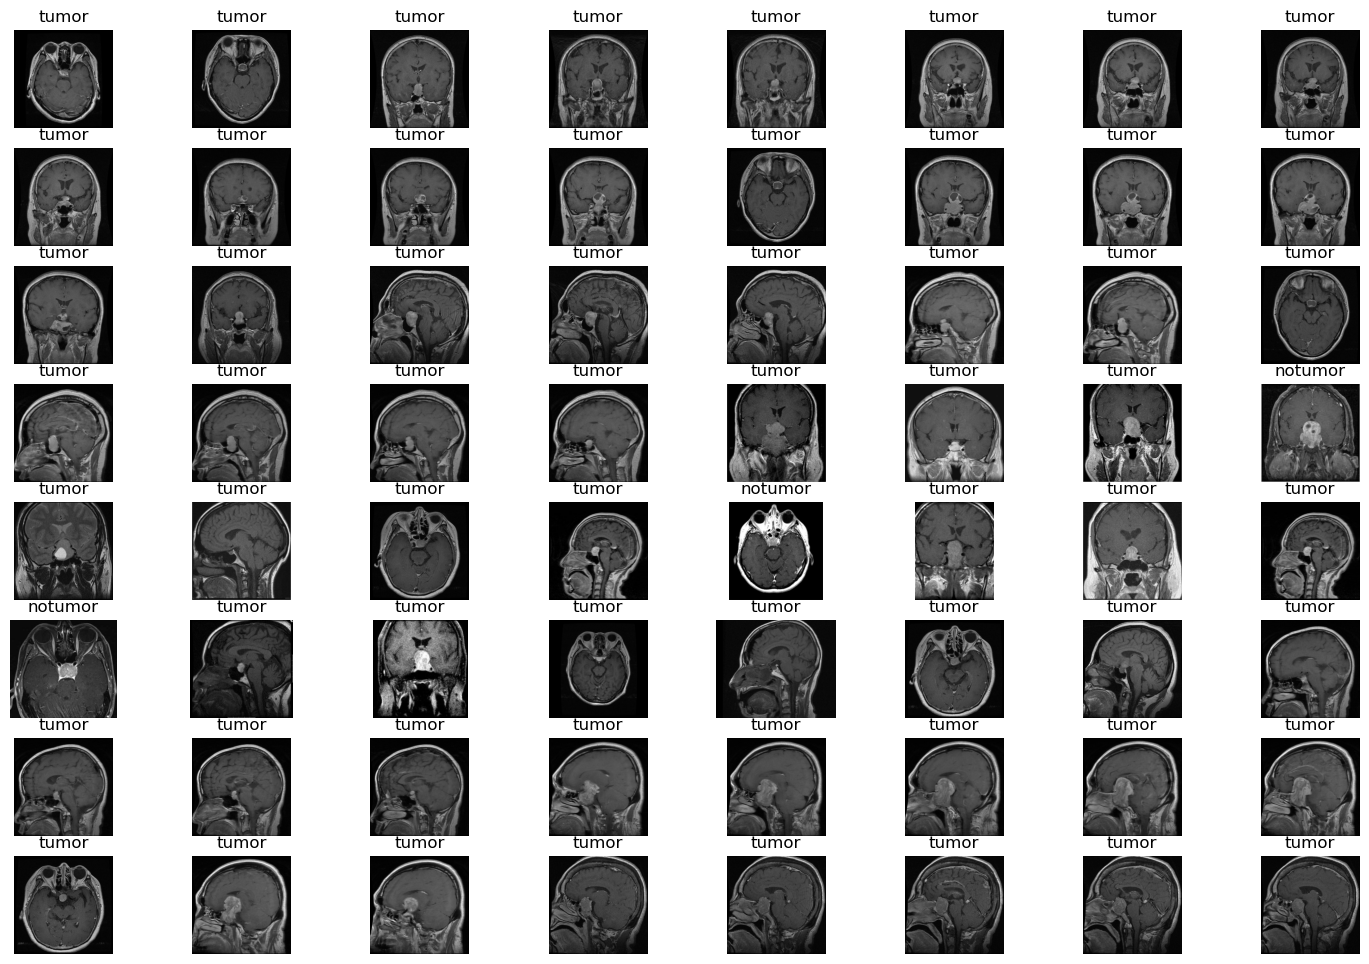

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
dirct = r""
plt.figure(figsize=(18,12))
p = os.listdir(dirct + '/tumor')
c = 1
dec = ["notumor", "tumor"]  # Sınıf etiketleri

for i in os.listdir(dirct + '/tumor/')[:64]:
    plt.subplot(8, 8, c)

    img = cv2.imread(dirct + '/tumor/' + i)
    img1 = cv2.resize(img, (224,224))

    # ✅ Tek tek tahmin yap
    predict_img = np.expand_dims(img1, axis=0)  # Modelin beklediği formatta (1, 224, 224, 3)
    predict_img = predict_img / 255.0  # Normalizasyon

    # ✅ Modelden tahmin al
    p = loaded_model.predict(predict_img)

    # ✅ Modelin sigmoid mi yoksa softmax mi olduğunu kontrol et
    if loaded_model.output_shape[-1] == 1:  # Sigmoid modeli
        result = "tumor" if p[0][0] > 0.5 else "notumor"
    else:  # Softmax modeli
        result = dec[np.argmax(p)]

    # ✅ Görüntüyü çiz
    plt.title(result)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # RGB formatına çevirerek doğru renklerde göster
    plt.axis('off')
    c += 1

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

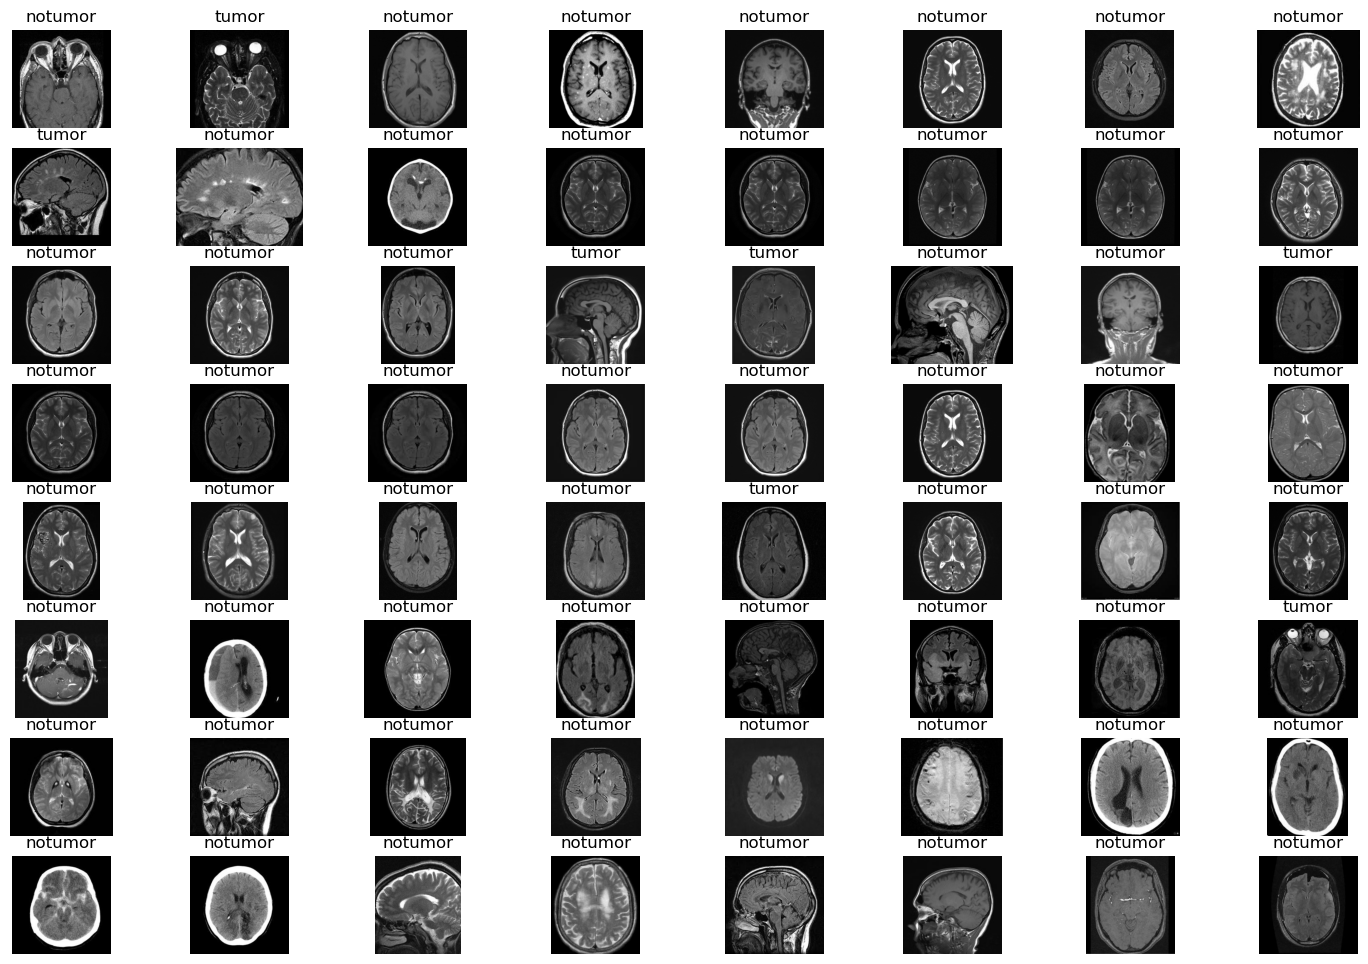

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
dirct = r""
plt.figure(figsize=(18,12))
p = os.listdir(dirct + '/notumor')
c = 1
dec = ["notumor", "tumor"]  # Sınıf etiketleri

for i in os.listdir(dirct + '/notumor/')[:64]:
    plt.subplot(8, 8, c)

    img = cv2.imread(dirct + '/notumor/' + i)
    img1 = cv2.resize(img, (224,224))

    # ✅ Tek tek tahmin yap
    predict_img = np.expand_dims(img1, axis=0)  # Modelin beklediği formatta (1, 224, 224, 3)
    predict_img = predict_img / 255.0  # Normalizasyon

    # ✅ Modelden tahmin al
    p = loaded_model.predict(predict_img)

    # ✅ Modelin sigmoid mi yoksa softmax mi olduğunu kontrol et
    if loaded_model.output_shape[-1] == 1:  # Sigmoid modeli
        result = "tumor" if p[0][0] > 0.5 else "notumor"
    else:  # Softmax modeli
        result = dec[np.argmax(p)]

    # ✅ Görüntüyü çiz
    plt.title(result)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # RGB formatına çevirerek doğru renklerde göster
    plt.axis('off')
    c += 1

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Gerçek: tumor, Model Çıkışı: [[0.02968924 0.97031075]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Gerçek: notumor, Model Çıkışı: [[0.05489784 0.9451022 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Gerçek: tumor, Model Çıkışı: [[0.17792848 0.82207155]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Gerçek: notumor, Model Çıkışı: [[0.9886439  0.01135612]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Gerçek: notumor, Model Çıkışı: [[0.92591035 0.0740896 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Gerçek: tumor, Model Çıkışı: [[0.05245318 0.9475468 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Gerçek: notumor, Model Çıkışı: [[9.9904007e-01 9.5992797e-04]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Gerçek: notumor, Model Çıkışı: [[0.9814471  0.01855292]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Gerçek: tumor, Model Çıkışı: [[0.20801787 0.7919821 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Gerçek: tumor, Model Çıkışı: [[0.03070261 0.9692974 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Gerçek: notumor,

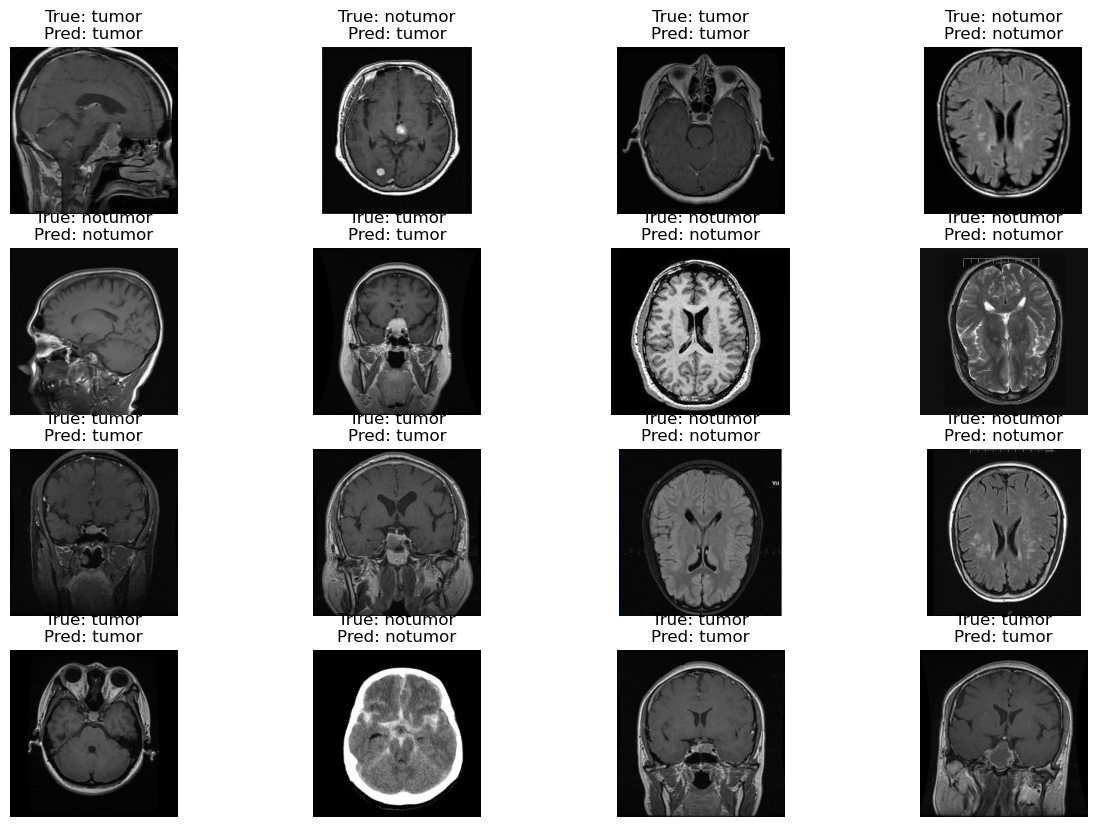

In [40]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image  # Resim ön işleme için

# 📌 Klasör yollarını tanımla
base_dir = r"C:\Users\mert\Desktop\Brain_Tumor_Data\Testing"
tumor_dir = os.path.join(base_dir, "tumor")
notumor_dir = os.path.join(base_dir, "notumor")

# 📌 Tüm resimleri topla
notumor_images = [os.path.join(notumor_dir, img) for img in os.listdir(notumor_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
tumor_images = [os.path.join(tumor_dir, img) for img in os.listdir(tumor_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

# 📌 Tüm resimleri birleştir ve karıştır
all_images = notumor_images + tumor_images
random.shuffle(all_images)

# 📌 Resim ön işleme fonksiyonu (modelinize uygun şekilde ayarlayın)
def preprocess_image(img_path, target_size=(224, 224)):  
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalizasyon (0-1 arası)
    return img_array

# 📌 Modelin çıktı yapısını otomatik algılayan tahmin fonksiyonu
def predict_and_show(model, img_paths, num_images=5):
    plt.figure(figsize=(15, 10))
    
    for i in range(min(num_images, len(img_paths))):
        img_path = img_paths[i]

        # Doğru etiketi belirle
        true_label = "notumor" if img_path in notumor_images else "tumor"

        # Resmi işle
        processed_img = preprocess_image(img_path)

        # Tahmin yap
        prediction = model.predict(processed_img)
        
        # Tahmin çıktısını yazdır
        print(f"Gerçek: {true_label}, Model Çıkışı: {prediction}")

        # Modelin çıktı şekline göre etiketi belirle
        if prediction.shape == (1, 2):  # Softmax
            predicted_label = "tumor" if np.argmax(prediction) == 1 else "notumor"
        elif prediction.shape == (1, 1):  # Sigmoid
            predicted_label = "tumor" if prediction[0][0] > 0.5 else "notumor"
        else:
            predicted_label = "Bilinmeyen Çıkış"

        # Resmi çizdir
        img = image.load_img(img_path)
        plt.subplot(4, 4, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
    
    plt.show()

# 📌 Modeli çağırarak tahmin yap
predict_and_show(loaded_model, all_images, num_images=16)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\mert\AppData\Local\Temp\ipykernel_5816\3417015778.py:39: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\mert\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


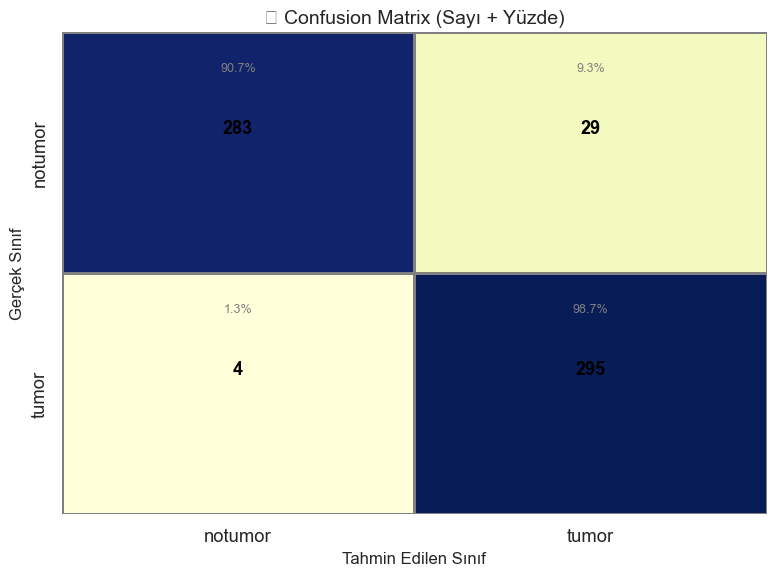

🔎 Sınıflandırma Raporu:

              precision    recall  f1-score   support

     notumor       0.99      0.91      0.94       312
       tumor       0.91      0.99      0.95       299

    accuracy                           0.95       611
   macro avg       0.95      0.95      0.95       611
weighted avg       0.95      0.95      0.95       611



In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Tahminleri al
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix ve normalize edilmiş versiyonu
cm = confusion_matrix(y_true, y_pred_classes)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize

class_names = list(classes.keys())

# Görselleştirme başlat
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

ax = sns.heatmap(cm, annot=False, cmap='YlGnBu', fmt='d',
                 xticklabels=class_names, yticklabels=class_names,
                 cbar=False, linewidths=1, linecolor='gray')

# Sayıları ve yüzdeleri ayrı ayrı yaz
for i in range(len(cm)):
    for j in range(len(cm[0])):
        count = cm[i][j]
        percent = cm_norm[i][j] * 100
        ax.text(j + 0.5, i + 0.4, f"{count}", 
                ha='center', va='center', fontsize=13, fontweight='bold', color='black')
        ax.text(j + 0.5, i + 0.15, f"{percent:.1f}%", 
                ha='center', va='center', fontsize=9, color='gray')

# Etiketler ve başlıklar
plt.xlabel('Tahmin Edilen Sınıf', fontsize=12)
plt.ylabel('Gerçek Sınıf', fontsize=12)
plt.title('🔍 Confusion Matrix (Sayı + Yüzde)', fontsize=14)
plt.tight_layout()
plt.show()

# Sınıflandırma Raporu
print("🔎 Sınıflandırma Raporu:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


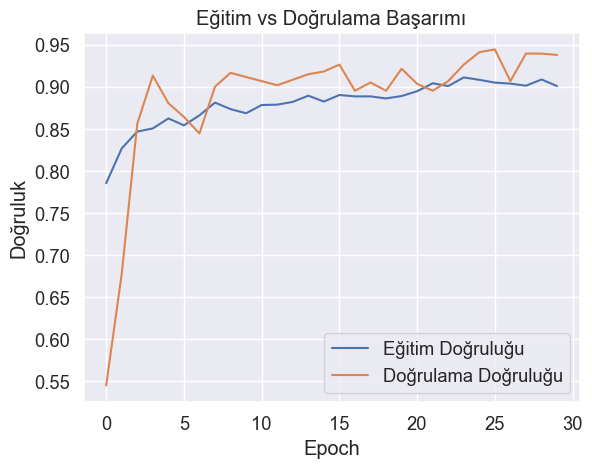

In [44]:
# Eğitim ve doğrulama grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Eğitim vs Doğrulama Başarımı')
plt.show()
